<a href="https://colab.research.google.com/github/sravya27082001/AI_Hackathon/blob/master/Copy_of_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


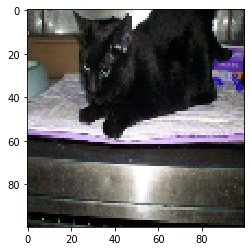

100%|██████████| 1000/1000 [08:52<00:00,  2.24it/s]


0
2
1
2
1
0
1
2
0
0


Train on 3000 samples
Epoch 1/5
3000/3000 [==============================] - 675s 225ms/sample - loss: 1.8791 - acc: 0.4577
Epoch 2/5
3000/3000 [==============================] - 659s 220ms/sample - loss: 1.5819 - acc: 0.4890
Epoch 3/5
3000/3000 [==============================] - 654s 218ms/sample - loss: 1.3059 - acc: 0.5337
Epoch 4/5
3000/3000 [==============================] - 652s 217ms/sample - loss: 1.2307 - acc: 0.5543
Epoch 5/5
600/600 [==============================] - 29s 48ms/sample - loss: 3.6013 - acc: 0.3383
Loss = 3.601263910929362
Test Accuracy = 0.33833334


In [0]:
from __future__ import absolute_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
import cv2
from tqdm import tqdm
from tensorflow.keras.models import load_model,save_model
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical
from glob import glob
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model,load_model,model_from_yaml
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

DATADIR="/content/drive/My Drive/Colab Notebooks/animals"
CATEGORIES = ["cats","dogs","panda"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join( path,img))
        break
    break

IMG_SIZE=100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []


for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

X = X/255.

y = to_categorical(y)

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)
#y = convert_to_one_hot(y, 6).T
#Y_test = convert_to_one_hot(Y_test_orig, 6).T

img_height,img_width = 100,100
num_classes = 3
bs=64

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import categorical_crossentropy

adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs = 5, batch_size = bs)

model.save('my_model.h5')
preds = model.evaluate(xTest, yTest)


print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))